**This is an Exploratory Data Analysis on the Udemy dataset<br />
Name of dataset: IT & Software Courses Udemy - 22k+ courses<br />
Source of dataset: https://www.kaggle.com/jilkothari/it-software-courses-udemy-22k-courses<br />
<br />
This project will be focusing on answering the following questions:**
1. What makes a course popular in Udemy?
2. Are there any trend in the Udemy over the years?
3. Popular keywords used in Udemy


Setting up the environment
1. Importing the relevant packages
2. Importing data from the file into data frame

In [1]:
# To install new version of ploty & swifter package
#!pip3 install plotly==4.8
#!pip3 install swifter

# install pandas profiling package as it is not in colab
# -I force reinstall even if already installed
#!pip3 install -I pandas_profiling
#!pip install numpy==1.20.0

# Error installing pycaret
# pycaret is a low code machine learning package
# shap is a package used by pycaret to explain the outputs of a model
#!pip3 install pycaret --user
#!pip3 install shap --user

In [2]:
# Import the relevant packages

# for basic data cleaning operation
import numpy as np
import pandas as pd

# for visualisation
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns

%matplotlib inline
# Adjusts the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (12,8)

# for machine learning
# from pycaret.regression import *
# documentation: https://pycaret.readthedocs.io/en/latest/api/regression.html

# To control visual output
#pd.set_option('display.max_rows',15)

In [3]:
# Importing data from file

folder_path = "C:/Users/wilso/OneDrive/Desktop/Portfolio_Project/Datasets"
file = 'Udemy_data.csv'

df = pd.read_csv(folder_path + "/" + file)

Getting an initial feel of the data
1. Look at the first 5 rows of data
2. Getting indepth information for the data (Data types, number of rows, number of non-null)
3. Identify how much data are missing for each column
4. Look at the number of unique values for each column
5. Looking at the column names

In [4]:
# Initial look at the data

df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [5]:
# To get more information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22853 non-null  int64  
 1   title                         22853 non-null  object 
 2   url                           22853 non-null  object 
 3   is_paid                       22853 non-null  bool   
 4   num_subscribers               22853 non-null  int64  
 5   avg_rating                    22853 non-null  float64
 6   avg_rating_recent             22853 non-null  float64
 7   rating                        22853 non-null  float64
 8   num_reviews                   22853 non-null  int64  
 9   is_wishlisted                 22853 non-null  bool   
 10  num_published_lectures        22853 non-null  int64  
 11  num_published_practice_tests  22853 non-null  int64  
 12  created                       22853 non-null  object 
 13  p

In [6]:
# To check for missing data
# Perform a loop through the data to get the percentage of completeness

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing,5)}%')

id - 0.0%
title - 0.0%
url - 0.0%
is_paid - 0.0%
num_subscribers - 0.0%
avg_rating - 0.0%
avg_rating_recent - 0.0%
rating - 0.0%
num_reviews - 0.0%
is_wishlisted - 0.0%
num_published_lectures - 0.0%
num_published_practice_tests - 0.0%
created - 0.0%
published_time - 0.0%
discount_price__amount - 0.08003%
discount_price__currency - 0.08003%
discount_price__price_string - 0.08003%
price_detail__amount - 0.02175%
price_detail__currency - 0.02175%
price_detail__price_string - 0.02175%


In [7]:
# Getting the number of unique values for each column

df.nunique()

id                              22853
title                           22750
url                             22853
is_paid                             2
num_subscribers                  6824
avg_rating                       3235
avg_rating_recent               20070
rating                          20070
num_reviews                      1750
is_wishlisted                       1
num_published_lectures            392
num_published_practice_tests        7
created                         22851
published_time                  22846
discount_price__amount             55
discount_price__currency            1
discount_price__price_string       55
price_detail__amount               37
price_detail__currency              1
price_detail__price_string         37
dtype: int64

In [8]:
# Viewing the column names

df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

After doing the initial observation of the data, there are a few things that need to be done:

1. Rename columns for clarity
2. Changing created and published_time into the datetime format.
3. Expanding the datetime column into days, months and years column.
4. Inspect the missing values and decide what to do with it.
5. Add in additional columns for discounted price and price detail in SGD for easier reference. 
6. Drop off currency and price string columns as they are not useful.
7. Drop off wishlisted column as well as it all have one unique value (Not meaningful). 


In [9]:
# Rename columns for clarity

df = df.rename(columns = {'price_detail__amount':'full_price_INR',
                          'discount_price__amount':'discount_price_INR',
                          'published_time':'published_date',
                          'created':'created_date',
                          'num_published_practice_tests':'num_tests',
                          'num_published_lectures':'num_lectures'}) 

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_lectures,num_tests,created_date,published_date,discount_price_INR,discount_price__currency,discount_price__price_string,full_price_INR,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [10]:
# Changing created and published dates into datetime format and extract day,month and year from it

# for created date
df['created_date'] = df.created_date.apply(lambda x: x[:10])
df['created_date'] = pd.to_datetime(df["created_date"],format = '%Y/%m/%d')
df['created_year'] = df.created_date.dt.year
df['created_mth'] = df.created_date.dt.month
df['created_day'] = df.created_date.dt.day

# for published date
df['published_date'] = df.published_date.apply(lambda x: x[:10])
df['published_date'] = pd.to_datetime(df["published_date"],format = '%Y/%m/%d')
df['published_year'] = df.published_date.dt.year
df['published_mth'] = df.published_date.dt.month
df['published_day'] = df.published_date.dt.day

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            22853 non-null  int64         
 1   title                         22853 non-null  object        
 2   url                           22853 non-null  object        
 3   is_paid                       22853 non-null  bool          
 4   num_subscribers               22853 non-null  int64         
 5   avg_rating                    22853 non-null  float64       
 6   avg_rating_recent             22853 non-null  float64       
 7   rating                        22853 non-null  float64       
 8   num_reviews                   22853 non-null  int64         
 9   is_wishlisted                 22853 non-null  bool          
 10  num_lectures                  22853 non-null  int64         
 11  num_tests                   

In [11]:
# Look into the missing values

# Looking into full price being empty and it is a free course

df[df['full_price_INR'].isnull() & (df['is_paid'] == False)][['title','is_paid','discount_price_INR','full_price_INR']]

,title,is_paid,discount_price_INR,full_price_INR
11484,Stock Market Investing for Beginners,False,NaN,NaN
11485,Introduction to Financial Modeling,False,NaN,NaN
11486,Introduction to Corporate Finance (Mergers & A...,False,NaN,NaN
11487,Learn and Master the Basics of Finance,False,NaN,NaN
11488,Stock Market Foundations,False,NaN,NaN
...,...,...,...,...
13602,מסחר אוטומטי בשוק ההון,False,NaN,NaN
13603,מושגים בסיסיים באופציות חלק ב,False,NaN,NaN
13604,Programa de Integridade,False,NaN,NaN
13605,Goodwill and Method of Calculating Goodwill (A...,False,NaN,NaN


In [12]:
# Looking into full price being empty but it is a paid course

df[df['full_price_INR'].isnull() & (df['is_paid'] == True)][['title','is_paid','discount_price_INR','full_price_INR']]

,title,is_paid,discount_price_INR,full_price_INR
13607,Acabou a Previdência e agora? - Volume 03,True,NaN,NaN


**After a quick inspection, we can safely say that all of the courses which has missing prices belongs to the free courses category except for one course which indicate that it is paid but there is no price. <br />
<br />
We will proceed to add in zero to these empty fields to avoid errors later on.**

In [13]:
# To add in zeros for the missing values for discount price and full price

df.discount_price_INR = df.discount_price_INR.fillna(value = 0)
df.full_price_INR = df.full_price_INR.fillna(value = 0)

# To confirm that there is no more empty values in both columns - Should show (0,0) if no missing values

df.discount_price_INR.isnull().sum(), df.full_price_INR.isnull().sum()

(0, 0)

In [14]:
# To create new columns for discount and full prices in SGD to get a better sense of the pricing.
# Exchange rate for INR to SGD is 0.018 (as of 8th July 2021)

df['discount_price_SGD'] = list(round(df['discount_price_INR']*0.018,2))
df['full_price_SGD'] = list(round(df['full_price_INR']*0.018,2))

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,price_detail__currency,price_detail__price_string,created_year,created_mth,created_day,published_year,published_mth,published_day,discount_price_SGD,full_price_SGD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,...,INR,"₹8,640",2016,2,14,2016,4,6,8.19,155.52
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,...,INR,"₹8,640",2016,8,22,2016,8,23,8.19,155.52


In [15]:
# Showing the number of courses based on different discount price point 

df.discount_price_SGD.value_counts().sort_index()

0.00      1829
8.19     19700
8.32        63
8.42       231
8.53        51
8.64        32
8.66       137
8.78        45
8.89        38
9.00        16
9.13         9
9.25        13
9.36        39
9.47         1
9.59         4
9.72         3
9.83         2
9.94         2
10.08       15
11.00        2
11.52       36
12.60      164
12.96       21
13.32        2
13.68        2
14.40       58
15.84        5
17.28       17
18.72        9
20.16       13
21.60        9
23.04       14
24.48        7
25.92       12
27.36        9
28.80       43
30.24        4
31.68        5
33.12        2
34.56        9
36.00       10
37.44       10
38.88        5
40.32        9
41.76        3
43.20       24
44.64        3
46.08        4
47.52        3
48.96        7
50.40        7
51.84       12
53.28        3
54.72        3
56.16        3
57.60       74
Name: discount_price_SGD, dtype: int64

In [16]:
# Showing the number of courses based on different full price point 

df.full_price_SGD.value_counts().sort_index() 

0.00       497
23.04     5963
28.80     1324
34.56     1209
40.32      751
46.08      762
51.84      360
57.60     1633
63.36      196
69.12      282
74.88      151
80.64      222
86.40      352
92.16      276
97.92      145
103.68     227
109.44     430
115.20    1610
120.96     106
126.72      99
132.48      58
138.24     166
144.00     275
149.76     165
155.52    5187
161.28      98
167.04      43
172.80      64
178.56       4
184.32       9
190.08       3
195.84       2
201.60       5
207.36       7
213.12       6
218.88       4
224.64       9
230.40     153
Name: full_price_SGD, dtype: int64

In [17]:
# Remove currency, price string and wishlisted columns

df = df.drop(['is_wishlisted', 'discount_price__currency','discount_price__price_string',
            'price_detail__currency','price_detail__price_string'],axis=1)

In [18]:
# Review the data information again before starting the analysis and visualisation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  22853 non-null  int64         
 1   title               22853 non-null  object        
 2   url                 22853 non-null  object        
 3   is_paid             22853 non-null  bool          
 4   num_subscribers     22853 non-null  int64         
 5   avg_rating          22853 non-null  float64       
 6   avg_rating_recent   22853 non-null  float64       
 7   rating              22853 non-null  float64       
 8   num_reviews         22853 non-null  int64         
 9   num_lectures        22853 non-null  int64         
 10  num_tests           22853 non-null  int64         
 11  created_date        22853 non-null  datetime64[ns]
 12  published_date      22853 non-null  datetime64[ns]
 13  discount_price_INR  22853 non-null  float64   

In [19]:
# Comparing the average values based on whether the courses are paid or free

df.groupby('is_paid')['num_subscribers','avg_rating','num_reviews'].mean()

C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,num_subscribers,avg_rating,num_reviews
is_paid,,,
False,5854.482897,3.959954,308.678068
True,3146.557121,3.952187,269.423868


In [20]:
# Looking at the top 5 courses with the most number of subscribers

df_2 = df.sort_values('num_subscribers', ascending=False)
df_2[['id','title','published_date','num_subscribers','avg_rating','num_reviews','num_lectures'
      ,'discount_price_SGD','full_price_SGD']].head(5)

,id,title,published_date,num_subscribers,avg_rating,num_reviews,num_lectures,discount_price_SGD,full_price_SGD
13608,362328,AWS Certified Solutions Architect - Associate ...,2015-01-03,564444,4.53732,188941,136,8.19,155.52
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,2016-01-11,374836,4.47080,41630,83,8.19,155.52
13609,857010,Learn Ethical Hacking From Scratch,2016-06-20,372902,4.54790,83301,138,8.19,155.52
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,2016-04-06,295509,4.66019,78006,84,8.19,155.52
13614,437490,The Complete Ethical Hacking Course: Beginner ...,2015-03-19,277382,4.19544,26906,113,8.19,155.52


In [21]:
# Looking at the top 5 courses based on average rating and number of subscribers

df_3 = df.sort_values(['avg_rating','num_subscribers','num_reviews'], ascending=False)
df_3[['id','title','published_date','num_subscribers','avg_rating','num_reviews','num_lectures'
      ,'discount_price_SGD','full_price_SGD']].head(5)

,id,title,published_date,num_subscribers,avg_rating,num_reviews,num_lectures,discount_price_SGD,full_price_SGD
10955,2926552,Not for Profit QuickBooks Desktop vs QuickBook...,2020-04-02,5198,5.0,1,54,8.19,155.52
10907,2892636,Xero Not for Profit Organization,2020-03-24,5173,5.0,1,34,8.19,155.52
18611,2319342,How to install an Open Source LMS - Part 2,2019-05-06,4115,5.0,26,24,8.19,23.04
17894,2596322,Learn Linux commands and Powershell Command in...,2019-10-09,3925,5.0,37,27,8.19,23.04
22749,3460818,Python Tutorials - Python Crash Course for Beg...,2020-09-08,3912,5.0,3,23,8.19,23.04


<AxesSubplot:>

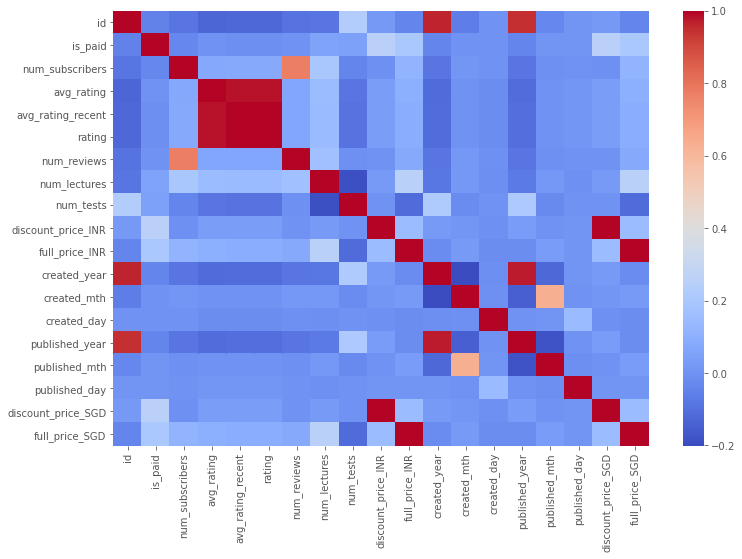

In [22]:
# Using Heatmap to get an idea of the correlation

sns.heatmap(df.corr(),cmap='coolwarm')

<AxesSubplot:xlabel='published_year', ylabel='published_mth'>

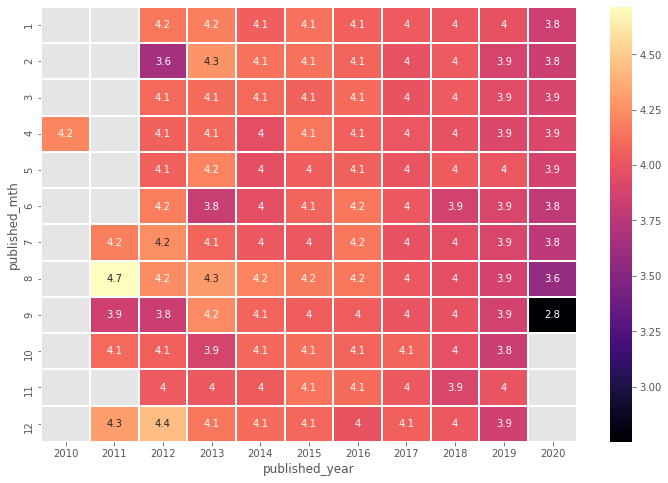

In [23]:
# Does published longer means average rating will be higher?
# Plotting average rating against the month and year which the course is published

rating_pivot = df.pivot_table(values='avg_rating',index='published_mth',columns='published_year', aggfunc=np.mean)
sns.heatmap(rating_pivot,cmap='magma',linecolor='white',linewidths=1, annot=True)

<AxesSubplot:xlabel='published_year', ylabel='published_mth'>

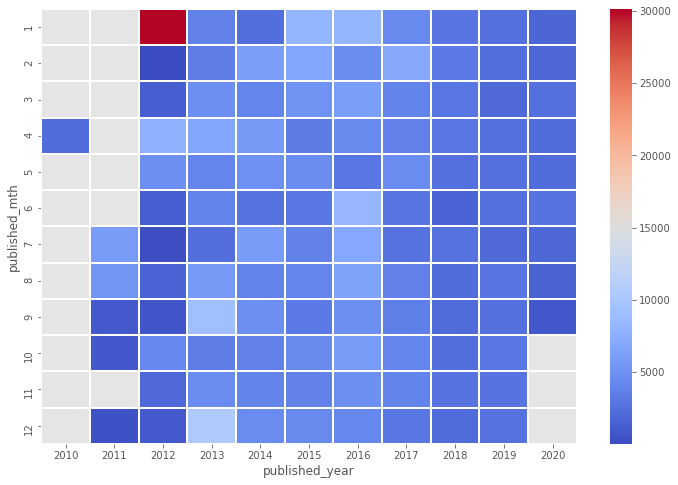

In [24]:
# Does published longer means there will be on average higher number of subscribers?
# Plotting number of subscribers against the month and year which the course is published

subscribers_pivot = df.pivot_table(values='num_subscribers',index='published_mth',columns='published_year', aggfunc=np.mean)
sns.heatmap(subscribers_pivot,cmap='coolwarm',linecolor='white',linewidths=1)

<AxesSubplot:xlabel='full_price_SGD', ylabel='Count'>

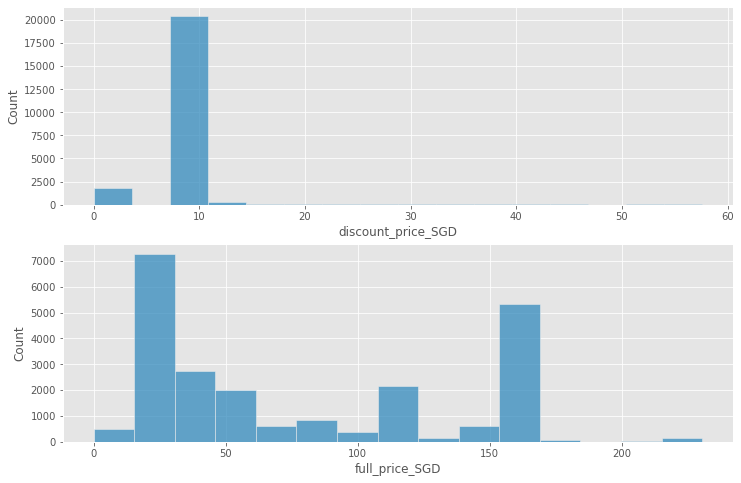

In [35]:
## Getting a sense of how the courses are priced

fig = plt.figure

# 2 rows, 1 cols - 2 charts
plt.subplot(2,1,1)
sns.histplot(df.discount_price_SGD)

plt.subplot(2,1,2)
sns.histplot(df.full_price_SGD,bins=15)

<AxesSubplot:xlabel='avg_rating'>

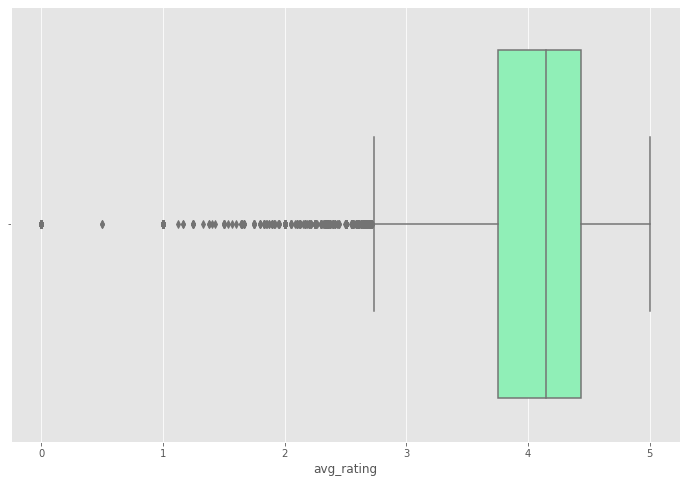

In [26]:
# Boxplot of average rating

sns.boxplot(x="avg_rating",data=df,palette='rainbow')

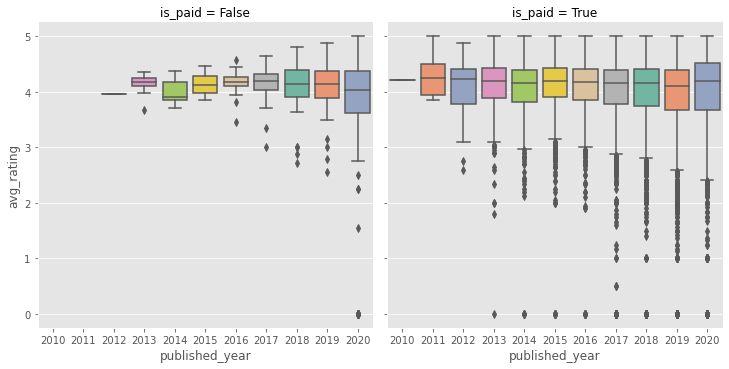

In [27]:
# Boxplot based on published year for average rating split by whether it is paid course

sns.catplot(x="published_year", y="avg_rating", data=df, col="is_paid", kind="box",palette="Set2")

<AxesSubplot:xlabel='published_year', ylabel='num_subscribers'>

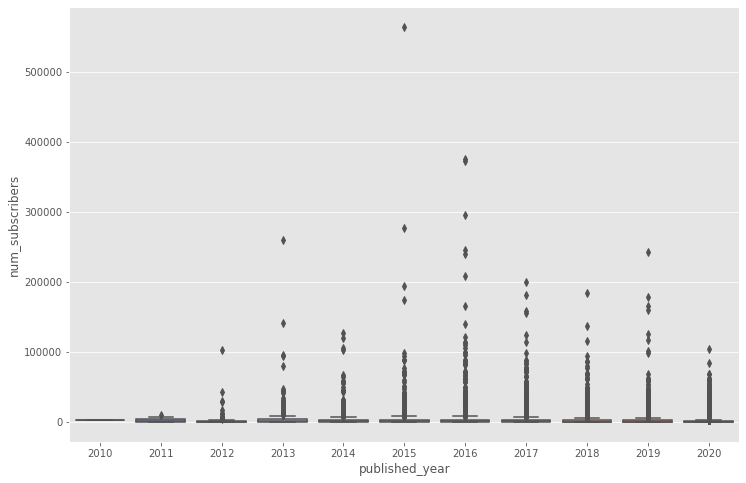

In [28]:
# Boxplot based on published year for number of subscribers

sns.boxplot(x="published_year", y="num_subscribers", data=df, palette="coolwarm")

<AxesSubplot:xlabel='discount_price_SGD', ylabel='num_subscribers'>

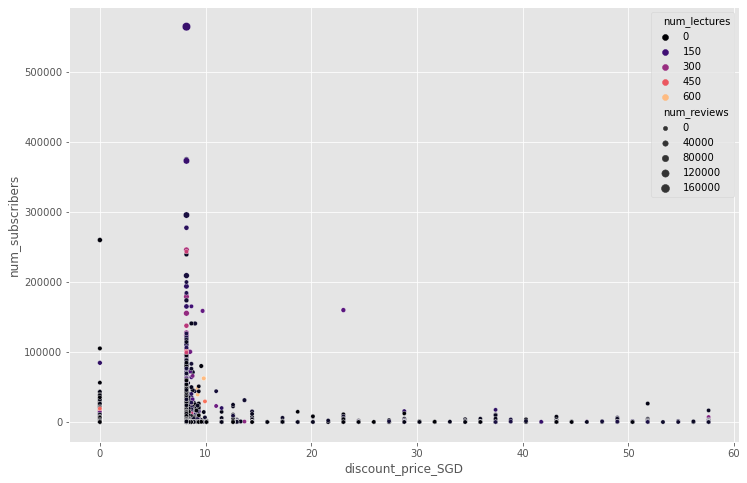

In [61]:
# Plotting the various elements together

sns.scatterplot(x='discount_price_SGD',y='num_subscribers',size='num_reviews', hue='num_lectures', data=df, palette='magma')

<AxesSubplot:xlabel='discount_price_SGD', ylabel='num_subscribers'>

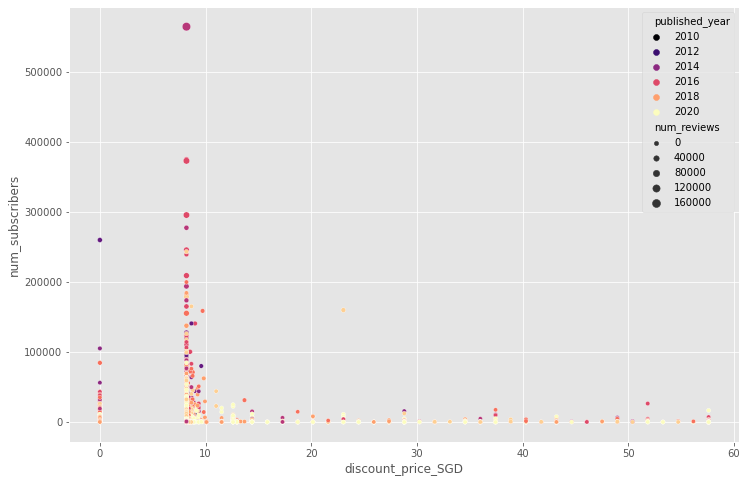

In [63]:
# Plotting the various elements together

sns.scatterplot(x='discount_price_SGD',y='num_subscribers',size='num_reviews', hue='published_year', data=df, palette='magma')

<AxesSubplot:xlabel='avg_rating', ylabel='num_subscribers'>

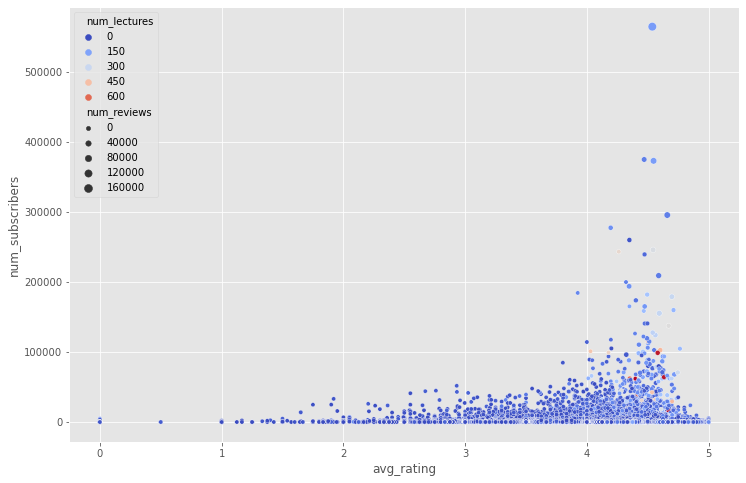

In [56]:
# Plotting the various elements together

sns.scatterplot(x='avg_rating',y='num_subscribers',size='num_reviews',hue='num_lectures', data=df,palette='coolwarm')

<AxesSubplot:xlabel='avg_rating', ylabel='num_lectures'>

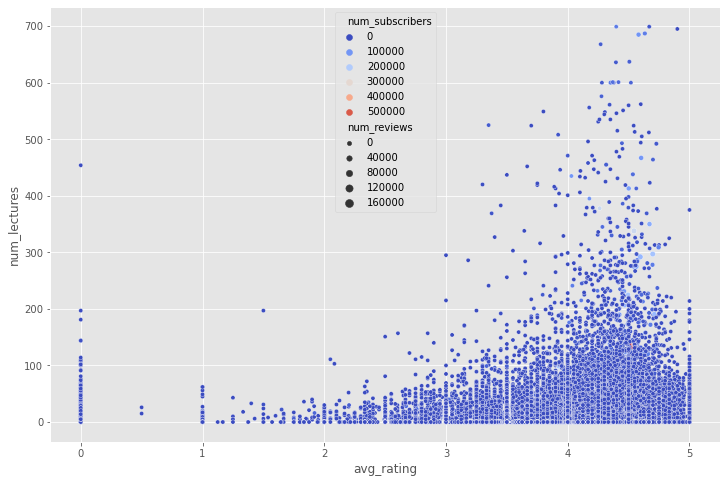

In [68]:
sns.scatterplot(x='avg_rating',y='num_lectures',size='num_reviews',hue='num_subscribers', data=df,palette='coolwarm')

<AxesSubplot:xlabel='avg_rating', ylabel='num_subscribers'>

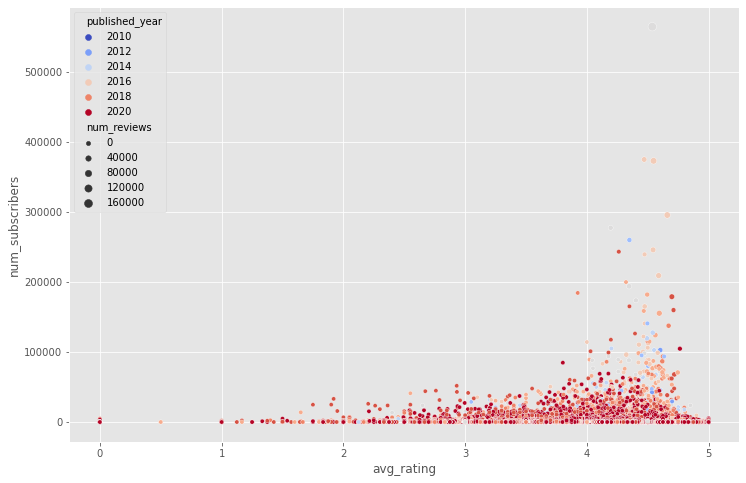

In [62]:
# Plotting the various elements together

sns.scatterplot(x='avg_rating',y='num_subscribers',size='num_reviews',hue='published_year', data=df,palette='coolwarm')

<AxesSubplot:xlabel='discount_price_SGD', ylabel='num_subscribers'>

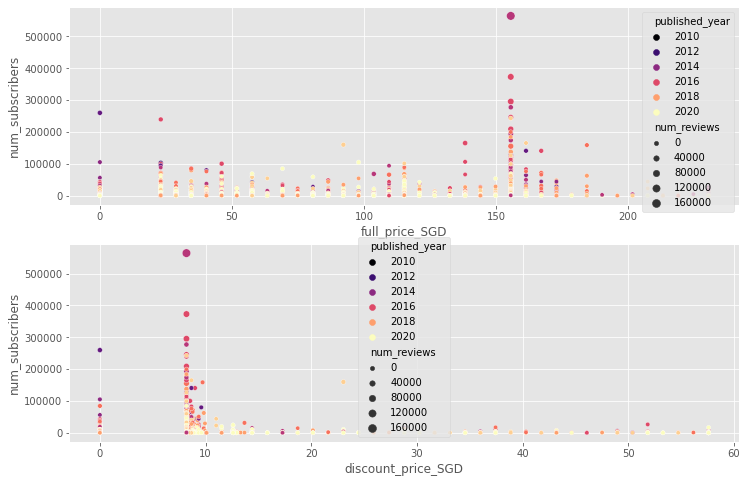

In [67]:
## Getting a sense of how the courses are priced

fig = plt.figure

# 2 rows, 1 cols - 2 charts
plt.subplot(2,1,1)
sns.scatterplot(x='full_price_SGD',y='num_subscribers',size='num_reviews', hue='published_year', data=df, palette='magma')

plt.subplot(2,1,2)
sns.scatterplot(x='discount_price_SGD',y='num_subscribers',size='num_reviews', hue='published_year', data=df, palette='magma')

In [70]:
df['diff_price_SGD'] = df.full_price_SGD - df.discount_price_SGD

<AxesSubplot:xlabel='diff_price_SGD', ylabel='num_subscribers'>

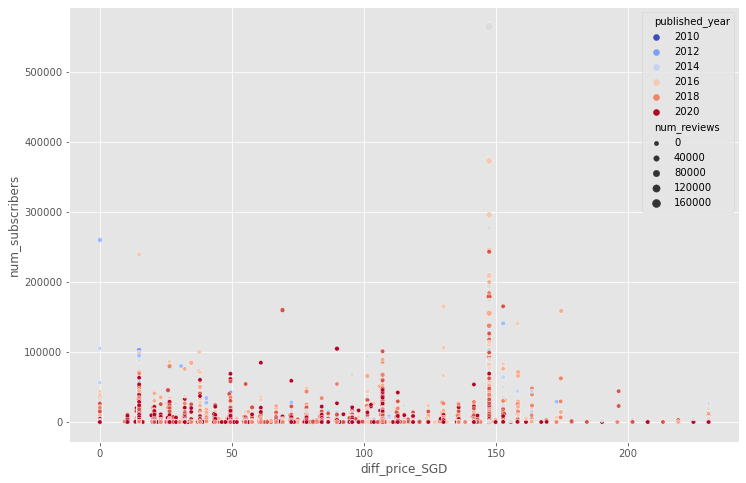

In [71]:
# Plotting the various elements together

sns.scatterplot(x='diff_price_SGD',y='num_subscribers',size='num_reviews',hue='published_year', data=df,palette='coolwarm')

<AxesSubplot:xlabel='diff_price_SGD', ylabel='num_subscribers'>

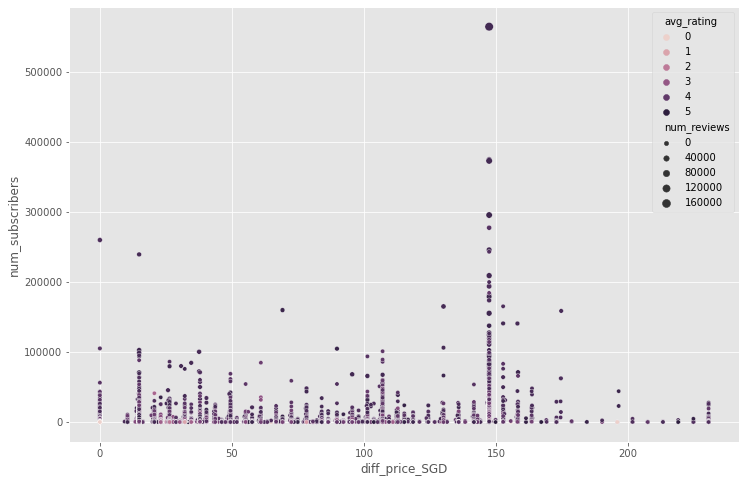

In [80]:
# Plotting the various elements together

sns.scatterplot(x='diff_price_SGD',y='num_subscribers',size='num_reviews',hue='avg_rating', data=df)

Visualisation:
1. Average number of subscribers 
2. Correlation between the features (Heatmap)
3. Average rating Paid vs free course (Box plot) - discount or not
4. Avg_rating vs num_subscribers (Scatterplot)
5. Avg_rating vs num_of_test (Scatterplot)
6. Avg_rating vs num_of_lessons (Scatterplot)
7. Dashboard - Histogram for number of test | number of reviews | number of lectures | Price range
8. Wordmap


In [74]:
# View data

df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_lectures,...,full_price_INR,created_year,created_mth,created_day,published_year,published_mth,published_day,discount_price_SGD,full_price_SGD,diff_price_SGD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,84,...,8640.0,2016,2,14,2016,4,6,8.19,155.52,147.33
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,78,...,8640.0,2016,8,22,2016,8,23,8.19,155.52,147.33


In [30]:
mylist = list(df.is_paid.unique())
mylist

[True, False]